# Bestimate: A Zillow Regression Model
### By Tyler Applegate, Florence Cohort, 2021_06_15

## Project Planning:
- Create a README.md ith project and business goals, as well as data dictionay and initial hypothoses.
- Create a function (or functions) to automate the process of connecting to the Codeup Database, and acquiring the zillow dataframe.
- Save these functions to aquire.py so they can be imported into the final_report notebook.
- Create a series of functions to automate the process of cleaning and preparing the newly acquired zillow dataframe to get it ready for the exploratory, modeling, and MVP stages of the pipeline.
- Save these functions to prepare.py so they can be imported into the final_report notebook.
- Clearly define at least two hypotheses, set an alpha, run necessary statistical testing, reject, or fail to reject each null hypothesis, and document findings are key takeaways.
- Establish a baseline accuracy, model improvement goals.
- Train at least 3 different regression models.
- Evaluate these models on the train, and validate data sets.
- Choose the best model to evaluate on the test dataset.
- Document takeways, key findings, conclusions, and next steps in the final report notebook.

### Project Planning
#### Goal: leave this section with (at least the outline of) a plan for the project documented in your README.md file.

Think about the following in this stage:

Brainstorming ideas and form hypotheses related to how variables might impact or relate to each other, both within independent variables and between the independent variables and dependent variable.

Document any ideas for new features you may have while first looking at the existing variables and the project goals ahead of you.

Think about what things in your project are nice to have, versus which things are need to have. For example, you might document that you will only worry about trying to scale your features after creating and evaluating a baseline model.



### Executive Summary - Conclusion & Next Steps

### Data Acquisition

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import acquire
import prepare
import explore
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats

In [2]:
# bring in the data
df = acquire.get_zillow_data()

In [3]:
# let's grab a quick overview
acquire.overview(df)

This dataframe has 28182 rows and 8 columns.
----------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28182 entries, 0 to 28181
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   parcel_id        28182 non-null  int64  
 1   bath             28182 non-null  float64
 2   bed              28182 non-null  float64
 3   sqft_calc        28114 non-null  float64
 4   fips             28182 non-null  float64
 5   yearbuilt        28090 non-null  float64
 6   appraised_value  28181 non-null  float64
 7   tax_amount       28181 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.9 MB
None
----------------------------------

Unique value counts of each column

parcel_id          28157
bath                  20
bed                   13
sqft_calc           4056
fips                   3
yearbuilt            131
appraised_value    22786
tax_amount         27716
dtype: int64
-----------

### Data Acquisition - Key Findings and Takeaways:
- Always remember to push up the .gitignore first, to keep login credentials private/secure
- The get_connection function will work for any database in the Codeup database (IF you have login credentials.)
    - If you do not, this function can be adjusted to work with whatever database you do have credentials for
- The new_zillow_data function is great for this project, and can be tweaked to work for others...
    - Always test of the sql_query in Sequal Ace first!!!!!
    - This query can be as simple of complex as you need it to be
- The get_zillow_data function is a wonderful time saver / effeciency optimisor
    - The function will first look to see if there is a .csv of the db stored locally, and open it if available
    - If not, it will run the new_telco_data function to acquire the telco_churn, and store it to the local
- The overview function is a great way to get a bird's eye view of the dataset
- This dataset is 28182 rows, by 8 columns.
- At first glance, there appear to be pletny of null and missing values that need to be addressed.

### Data Preparation

In [4]:
# This combines 3 of my data prep functions:
# initial_setup - resets index to parcel_id, drops duplicates and null values
# change_columns converts some floats to ints to make tables more readable
# drop_outliers drops outliers that are 1.5 * outside the IQR
df = prepare.prep_zillow()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23796 entries, 11721753 to 10713993
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bath             23796 non-null  float64
 1   bed              23796 non-null  int64  
 2   sqft_calc        23796 non-null  int64  
 3   fips             23796 non-null  int64  
 4   yearbuilt        23796 non-null  int64  
 5   appraised_value  23796 non-null  int64  
 6   tax_amount       23796 non-null  float64
 7   age              23796 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.6 MB


In [5]:
# now let's split the data
train, \
validate, \
test, \
X_train, \
y_train, \
X_validate, \
y_validate, \
X_test, \
y_test = prepare.zillow_split(df, 'appraised_value')

In [6]:
# time to scale continuous variables
prepare.scale_zillow(X_train, X_validate, X_test, MinMaxScaler(), 'scaled_mm')

(MinMaxScaler(),
 ['sqft_calc_scaled_mm', 'yearbuilt_scaled_mm', 'age_scaled_mm'])

In [7]:
# what do my DFs look like?
print(f'The shape of my train DataFrame is {train.shape}')
print(f'The shape of my validate DataFrame is {validate.shape}')
print(f'The shape of my test DataFrame is {test.shape}')

The shape of my train DataFrame is (13325, 8)
The shape of my validate DataFrame is (5711, 8)
The shape of my test DataFrame is (4760, 8)


## Data Preparation - Key Findings and Takeaways
- Starting out with a dataframe that is 28182 rows by 8 columns with numerous null values
- The prep_zillow function combines three of my functions to prepare the zillow DataFrame
    - initial_setup:
        - Resets the index to parcel_id
        - Drops whitespaces, null values and duplicates
    - change_columns:
        - Creates an age column that is easier to read than yearbuilt
        - Converts floats that do not have decimal values to ints to make reading tables easier
    - drop_outliers:
        - Drops all values that are outside 1.5 * the IQR
        - Decision to drop due to time constraints of this project
        - With more time, I'd love to fully dive in and impute appropriate values
- The split_data function takes the df and splits into a train, validate, and test set, as well as X_df and y to build and test ML models
    - To replicate, please use the same random state of 1221, and stratify on 'appraised_value'

### Data Exploration

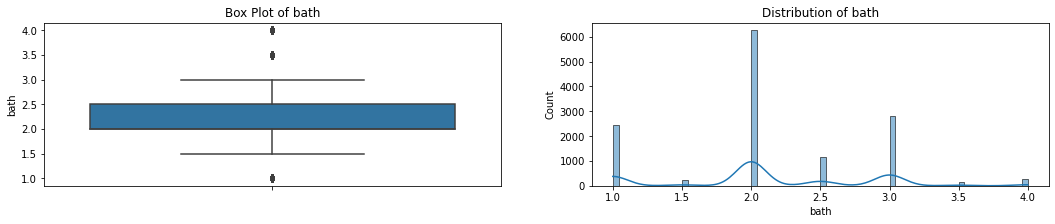

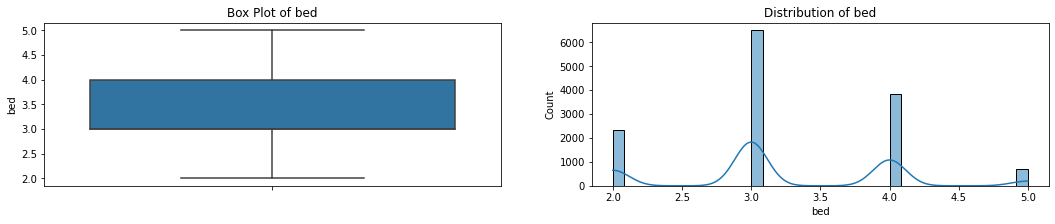

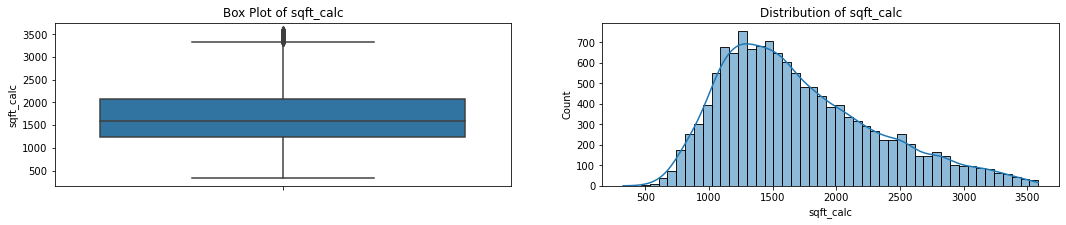

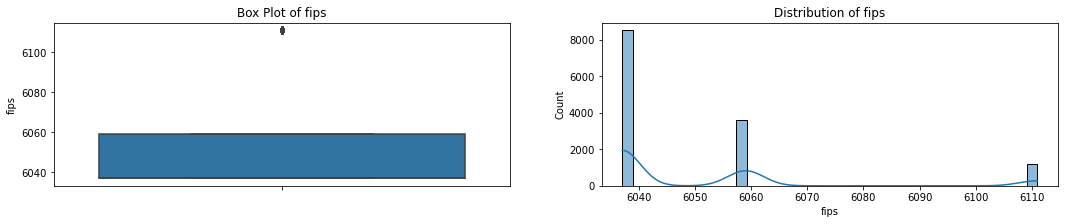

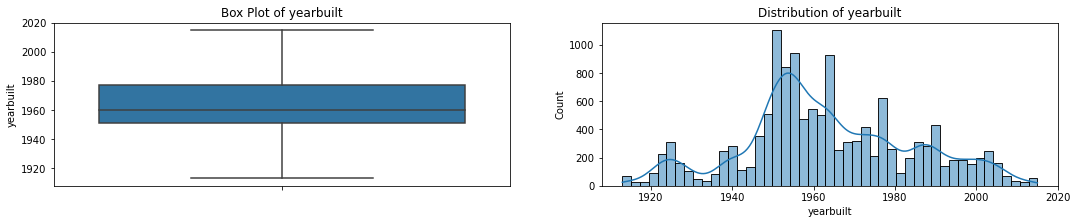

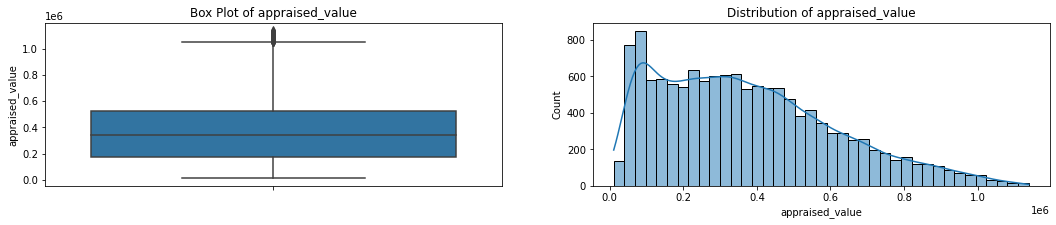

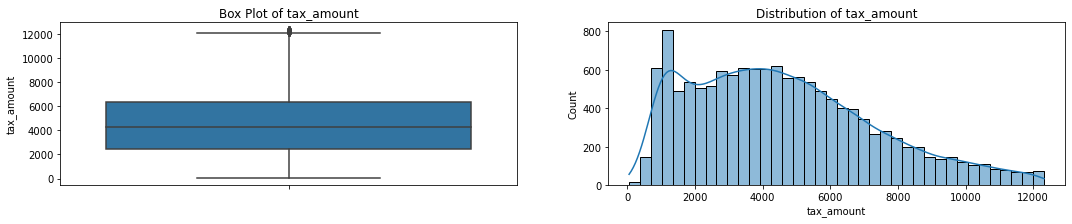

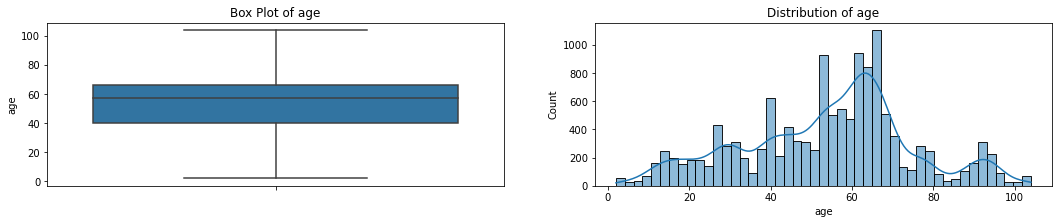

In [8]:
# let's look at univariate variables
explore.explore_univariate(train)

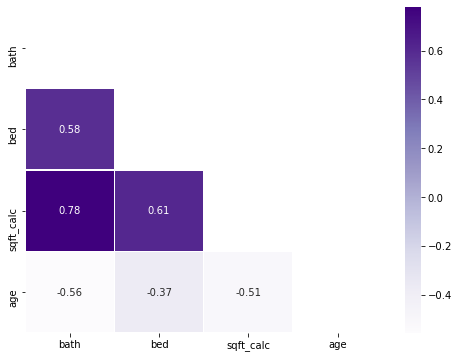

In [9]:
explore.zillow_heat(train)

#### Hypothesis Testing
- Hypothosis 1: We reject the null hypothesis
    - alpha: 0.05
    - $H_O$: The age of the home has no impact on the appraised value, (they are independent variables.)
    - $H_a$: The age of the home has an impact on the appraised value, (they are dependent variables.)
- Hypothosis 2: We reject the null hypothesis
    - alpha: 0.05
    - $H_O$: The mean appraised value of single unit properties with one bathroom is the same for those with more than one bathroom; (they are independent variables.)
    - $H_a$: The mean appraised value of single unit properties with one bathroom is less than those with more than one bathroom; (they are dependent variables.)

In [13]:
# lets test Hypothesis 1 - since age is roughly normally distributed, we can use Pearson's R

corr, p = stats.pearsonr(train['age'], train['appraised_value'])
print(corr, p)
# set alpha
alpha = 0.05

null_hypothesis = "The age of the home has no impact on the appraised value, (they are independent variables."

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')


-0.24982440075775664 9.977013486647794e-189

We can reject the null hypothesis that The age of the home has no impact on the appraised value, (they are independent variables.


In [17]:
# let's test Hypothesis 2 - 

# set up groups for testing
one_bath = train[train['bath'] == 1]
more_than_one_bath = train[train['bath'] > 1]

# perform 2 sample, 1-tailed t-test
t, p = stats.ttest_ind(more_than_one_bath['appraised_value'], one_bath['appraised_value'])
print(t, p/2)

# set alpha
alpha = 0.05

null_hypothesis = "The mean appraised value of single unit properties with one bathroom is the same for those with more than one bathroom; (they are independent variables.)"

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')

25.923061414676045 6.825228117854158e-145

We can reject the null hypothesis that The mean appraised value of single unit properties with one bathroom is the same for those with more than one bathroom; (they are independent variables.)
